<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/ParsingWebpages(JARVIS_DFT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
jid_example="JVASP-1044"


In [3]:
from jarvis.db.webpages import Webpage
w = Webpage(jid=jid_example)

In [4]:
data = w.data
print (data['basic_info'].keys())

dict_keys(['convergence_info', 'wannier_band_comparison', 'vacancy_formation_energy', 'raman_dat', 'main_relax_info', 'main_band', 'main_hse06_band', 'effective_mass', 'main_pbe0_band', 'main_optics_semilocal', 'main_optics_mbj', 'main_elastic', 'main_boltz', 'main_lepsilon_info', 'main_spillage_info', 'efg_raw_tensor', 'max_efg', 'max_efg_eta', 'main_stm_pos', 'main_stm_neg'])


Here *data* contains the webpage information as nested key-value pairs. Note that these arrays could be in string format, so we convert them into floats before plotting etc.

Only few examples are shown below:

Basic information table

In [5]:
data['basic_info']['main_relax_info'].keys()

dict_keys(['source_folder', 'see_also', 'tmp_source_folder', 'id_file', 'tmp_id_file', 'ehull', 'data_source', 'tmp_data_source', 'material_type', 'tmp_material_type', 'exfoliation_energy', 'magmom', 'XRD', 'id', 'download_files', 'tmp_id', 'formula', 'tmp_formula', 'elements', 'tmp_elements', 'number_uniq_species', 'method', 'tmp_method', 'formation_energy', 'relaxed_energy', 'spacegroup_number', 'point_group_symbol', 'spg_space_group_symbol', 'crys_system', 'a_conv', 'b_conv', 'c_conv', 'alpha_conv', 'beta_conv', 'gamma_conv', 'a_prim', 'b_prim', 'c_prim', 'alpha_prim', 'beta_prim', 'gamma_prim', 'prim_natoms', 'conv_natoms', 'density', 'magnetization', 'total_charge', 'volume', 'packing_fr', 'xyz', 'poscar_conv', 'contcar', 'cif', 'cfid_descs', 'rdf_bins', 'rdf_hist', 'ang1_bins', 'ang1_hist', 'ang2_bins', 'ang2_hist', 'dihedral_bins', 'dihedral_hist', 'scf_indir_gap', 'scf_dir_gap', 'scf_indir_gap_cbm', 'scf_indir_gap_vbm', 'scf_indir_gap_tol', 'scf_indir_gap_tol_cbm', 'scf_indir_g

In [6]:
print ('Formula:',data['basic_info']['main_relax_info']['formula'],', Spacegroup:',data['basic_info']['main_relax_info']['spg_space_group_symbol'])

Formula: W , Spacegroup: Im-3m


In [7]:
from jarvis.io.vasp.inputs import Poscar
pos=Poscar.from_string(data['basic_info']['main_relax_info']['contcar'].replace('\\n','\n').strip('"').strip("'"))
atoms=pos.atoms
print (atoms)

W
1.0
2.600569481053341 -5.76983845e-08 -0.9194402393314425
-1.3002847874910006 2.2521588581359304 -0.9194402327940574
-3.7970834e-08 -5.67938908e-08 2.7583206110535285
W
1
Cartesian
-1.0245827440000026e-12 1.8844273152e-11 1.0255525703999999e-11



XRD information

In [8]:
data["basic_info"]["main_relax_info"]["XRD"].keys()

dict_keys(['two_thetas', 'd_hkls', 'intensities'])

Text(0, 0.5, 'Intensity')

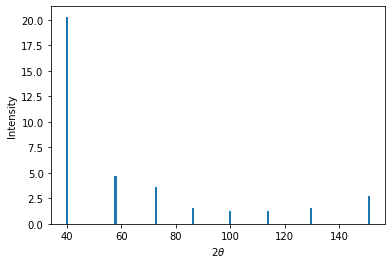

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
two_theta = np.array(data["basic_info"]["main_relax_info"]["XRD"]['two_thetas'].strip('"').strip("'").split(","),dtype='float')
ints = np.array(data["basic_info"]["main_relax_info"]["XRD"]['intensities'].strip('"').strip("'").split(","),dtype='float')
plt.bar(two_theta,ints)
plt.xlabel('2$\\theta$')
plt.ylabel('Intensity')

Electronic density of states

In [10]:
data["basic_info"]["main_relax_info"]["main_relax_dos"].keys()

dict_keys(['edos_energies', 'total_edos_up', 'total_edos_down', 'spdf_dos', 'elemental_dos', 'fermi_velocities'])

In [11]:
energies = np.array(data["basic_info"]["main_relax_info"]["main_relax_dos"]['edos_energies'].strip('"').strip("'").split(','),dtype='float')
total_edos_up = np.array(data["basic_info"]["main_relax_info"]["main_relax_dos"]['total_edos_up'].strip('"').strip("'").split(','),dtype='float')
total_edos_dn = np.array(data["basic_info"]["main_relax_info"]["main_relax_dos"]['total_edos_down'].strip('"').strip("'").split(','),dtype='float')

Text(0, 0.5, 'E-Ef (eV)')

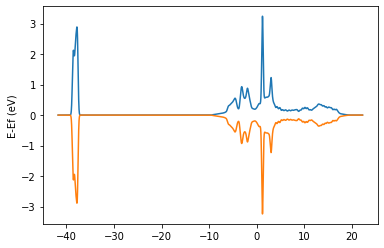

In [12]:
plt.plot(energies,total_edos_up)
plt.plot(energies,total_edos_dn)
plt.ylabel('E-Ef (eV)')

Frequency dependent dielectric fucntion

(0.0, 30.0)

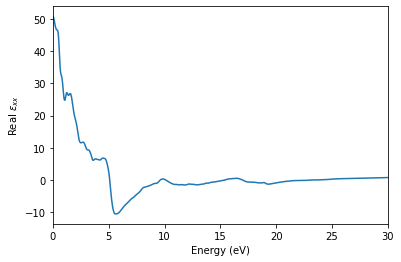

In [13]:
energies = np.array(data["basic_info"]["main_optics_mbj"]["main_optics_mbj_info"]["energies"].strip('"').strip("'").split(","),dtype="float")
real_part_xx = np.array(data["basic_info"]["main_optics_mbj"]["main_optics_mbj_info"]["real_1"].strip('"').strip("'").split(","),dtype="float")
plt.plot(energies,real_part_xx)
plt.xlabel('Energy (eV)')
plt.ylabel('Real $\epsilon_{xx}$')
plt.xlim([0,30])

Electronic bandstructure

In [14]:
x = data["basic_info"]["main_band"]["main_bands_info"]["spin_up_bands_x"].strip('"').strip("'").split(';')
y = data["basic_info"]["main_band"]["main_bands_info"]["spin_up_bands_y"].strip('"').strip("'").split(';')
kp_labels = data["basic_info"]["main_band"]["main_bands_info"]['kp_labels'].strip('"').strip("'").split(',')
kp_labels_points = np.array(data["basic_info"]["main_band"]["main_bands_info"]['kp_labels_points'].strip('"').strip("'").split(','),dtype='float')

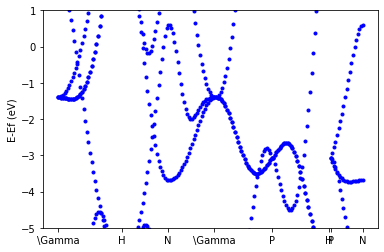

In [15]:
for i,j in zip(x,y):
  plt.plot(np.array(i.split(','),dtype='float'),np.array(j.split(','),dtype='float'),'.',c='b')
plt.ylabel('E-Ef (eV)')
plt.ylim([-5,1])
plt.xticks(kp_labels_points,kp_labels)
plt.show()

Elastic tensor and associated gamma-point phonons using finite difference method (ISIF = 3, IBRION =6)

In [16]:
data["basic_info"]["main_elastic"]["main_elastic_info"].keys()

dict_keys(['cij', 'voigt_bulk_modulus', 'voigt_shear_modulus', 'reuss_bulk_modulus', 'reuss_shear_modulus', 'poisson_ratio', 'youngs_modulus', 'universal_ansiotropy_ratio', 'unit_system', 'phonon_modes', 'min_fd_phonon_mode', 'phonon_dos_frequencies', 'phonon_dos_intensity', 'phonon_bandstructure_distances', 'phonon_bandstructure_frequencies', 'phonon_bandstructure_labels', 'phonon_bandstructure_label_points'])

In [17]:
cij = np.array([i.split(',') for i in data["basic_info"]["main_elastic"]["main_elastic_info"]['cij'].strip('"').strip("'").split(';')],dtype='float')

In [18]:
from jarvis.analysis.elastic.tensor import ElasticTensor
et = ElasticTensor(et_tensor=cij)

In [19]:
et.to_dict()

OrderedDict([('voigt_bulk_modulus', 305.20000000000005),
             ('voigt_shear_modulus', 143.46),
             ('reuss_bulk_modulus', 305.20000000000005),
             ('reuss_shear_modulus', 142.86244823138028),
             ('poisson_ratio', 0.29717633090228235),
             ('youngs_modulus', 371410702851.74054),
             ('universal_ansiotropy_ratio', 0.02091353522277295),
             ('raw_et_tensor',
              [[511.8, 201.9, 201.9, 0.0, 0.0, 0.0],
               [201.9, 511.8, 201.9, 0.0, 0.0, 0.0],
               [201.9, 201.9, 511.8, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 135.8, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 135.8, 0.0],
               [0.0, 0.0, 0.0, 0.0, 0.0, 135.8]])])

In [20]:
print ('Debye temp. K:', et.debye_temperature(atoms=atoms))

Debye temp. K: 361.95695568214165


Raw input/output files

In [21]:
data['basic_info']['main_relax_info']['download_files'].strip('"').strip("'").split(',')

['FD-ELAST',
 'JVASP-1044.zip',
 'https://ndownloader.figshare.com/files/22975559;OPT-LOPTICS',
 'JVASP-1044.zip',
 'https://ndownloader.figshare.com/files/24035969;OPT-Bandst',
 'JVASP-1044.zip',
 'https://ndownloader.figshare.com/files/23713373;TBMBJ',
 'JVASP-1044.zip',
 'https://ndownloader.figshare.com/files/23572028;DFT-SCF',
 'JVASP-1044.zip',
 'https://ndownloader.figshare.com/files/23127353;WANN',
 'JVASP-1044.zip',
 'https://ndownloader.figshare.com/files/23102822;']